In [90]:
import sqlite3
import os
import pandas as pd
import csv
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
db_file_name = "db/sample-superstore.sqlite"
con = sqlite3.connect(db_file_name)
cur = con.cursor()

In [92]:
def q(sql, cur, convert_to_df=True):
    cur.execute(sql)
    r = cur.fetchall()
    if convert_to_df:
        r.insert(0, next(zip(*cur.description)))
        #display(tabulate.tabulate(r, tablefmt="html", headers="firstrow"))
        return pd.DataFrame(r[1:], columns=r[0])
    else:
        return r

# 1 What is the category generating the maximum sales revenue?
    - What about the profit in this category?
    - Are they making a loss in any categroies?

In [93]:
sql = """
    SELECT ct.name, SUM(op.sales) AS Sales, SUM(op.profit) AS Profit
    FROM
        order_products AS op
        LEFT JOIN products AS p ON op.product_id = p.id
        LEFT JOIN product_subcategories AS sc ON p.subcategory_id = sc.id
        LEFT JOIN product_categories AS ct ON sc.category_id = ct.id
    GROUP BY ct.name
    ORDER BY Sales DESC
"""
cat_sales = q(sql, cur)


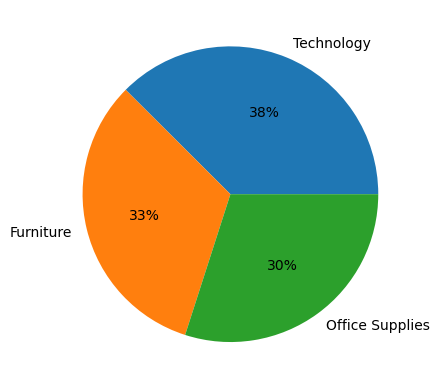

In [94]:
plt.pie(cat_sales['Sales'], labels=cat_sales['name'], autopct='%.0f%%')
plt.show()

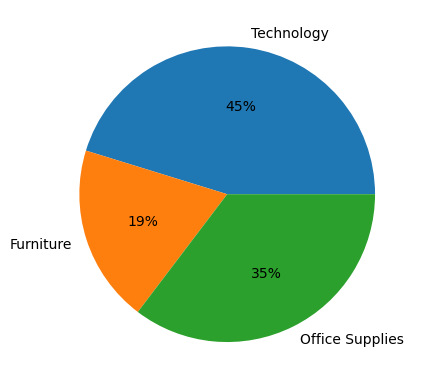

In [95]:
plt.pie(cat_sales['Profit'], labels=cat_sales['name'], autopct='%.0f%%')
plt.show()

# 2. What are 5 states generating the maximum and minimum sales revenue?

In [96]:
sql = """
    SELECT st.name, SUM(op.sales) AS Sales
    FROM
        order_products AS op
        LEFT JOIN orders AS o ON op.order_id = o.id
        LEFT JOIN customers AS cu ON o.customer_id = cu.id
        LEFT JOIN cities AS ci ON ci.id = cu.city_id
        LEFT JOIN states AS st ON st.id = ci.state_id
    GROUP BY st.name
    ORDER BY Sales DESC
    LIMIT 5
"""
q(sql, cur)

,name,Sales
0,Alabama,2.573371e+06
1,Australian Capital Territory,1.048426e+06
2,Alsace,9.866536e+05
3,Anhui,6.924110e+05
4,Andhra Pradesh,6.899823e+05


In [97]:
sql = """
    SELECT st.name, SUM(op.sales) AS Sales
    FROM
        order_products AS op
        LEFT JOIN orders AS o ON op.order_id = o.id
        LEFT JOIN customers AS cu ON o.customer_id = cu.id
        LEFT JOIN cities AS ci ON ci.id = cu.city_id
        LEFT JOIN states AS st ON st.id = ci.state_id
    GROUP BY st.name
    ORDER BY Sales ASC
    LIMIT 5
"""
q(sql, cur)

,name,Sales
0,Khatlon,300.666
1,Ashgabat,403.014
2,Gulu,473.112
3,Bulawayo,793.527
4,Al Hudaydah,1216.587


# 3. What are the 3 products in each product segment with the highest sales?
Are they the 3 most profitable products as well?

In [114]:
sql = """
    SELECT
        product_categories.name AS category,
        product_subcategories.name AS subcategory,
        product_subcategories.id AS subcategory_id
    FROM
        product_subcategories
        JOIN product_categories ON product_subcategories.category_id = product_categories.id
"""
subcats = q(sql, cur, convert_to_df=False)

for subcat in subcats:
    print(f"============= {subcat[0]} -> {subcat[1]} ===============")
    sql = """
        SELECT
            products.name,
            SUM(order_products.sales) AS sales
        FROM
            order_products
            JOIN products ON order_products.product_id = products.id
        WHERE
            products.subcategory_id = {subcat[2]}
        GROUP BY products.name
        ORDER BY sales DESC
        LIMIT 3
    """.format(subcat=subcat)
    display(q(sql, cur))



============= Technology -> Accessories ===============


,name,sales
0,"Belkin Router, USB",24870.2080
1,"Memorex Router, Erganomic",21888.5940
2,"Belkin Router, Erganomic",19888.5312


============= Office Supplies -> Appliances ===============


,name,sales
0,"Hoover Stove, White",32842.6043
1,"Hoover Stove, Red",32644.1310
2,"Hamilton Beach Stove, Silver",28657.0490


============= Office Supplies -> Art ===============


,name,sales
0,"Boston Canvas, Fluorescent",7798.9110
1,"Binney & Smith Sketch Pad, Blue",6739.8688
2,"BIC Canvas, Fluorescent",6534.1944


============= Office Supplies -> Binders ===============


,name,sales
0,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1,GBC DocuBind TL300 Electric Binding System,19823.479
2,GBC Ibimaster 500 Manual ProClick Binding System,19024.500


============= Furniture -> Bookcases ===============


,name,sales
0,"Sauder Classic Bookcase, Traditional",39108.3030
1,"Safco Library with Doors, Pine",28693.3938
2,"Bush Library with Doors, Metal",28516.7142


============= Furniture -> Chairs ===============


,name,sales
0,"Hon Executive Leather Armchair, Adjustable",58193.4841
1,"Office Star Executive Leather Armchair, Adjust...",51449.8038
2,"Harbour Creations Executive Leather Armchair, ...",50121.5160


============= Technology -> Copiers ===============


,name,sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82400
1,"Hewlett Copy Machine, Color",34264.74030
2,"Canon Fax Machine, High-Speed",26832.60594


============= Office Supplies -> Envelopes ===============


,name,sales
0,"Cameo Interoffice Envelope, Recycled",2986.0295
1,"Cameo Mailers, with clear poly window",2912.4070
2,"Cameo Interoffice Envelope, Set of 50",2898.1825


============= Office Supplies -> Fasteners ===============


,name,sales
0,"Stockwell Paper Clips, Assorted Sizes",2574.5258
1,"Stockwell Clamps, Assorted Sizes",2496.5755
2,"Stockwell Clamps, 12 Pack",2280.6758


============= Furniture -> Furnishings ===============


,name,sales
0,"Rubbermaid Frame, Duo Pack",9833.1950
1,"Deflect-O Frame, Erganomic",7918.5600
2,"Eldon Frame, Durable",7124.9344


============= Office Supplies -> Labels ===============


,name,sales
0,"Dot Matrix Printer Tape Reel Labels, White, 50...",3322.8780
1,"Harbour Creations Removable Labels, Adjustable",1347.1290
2,"Novimex Removable Labels, Adjustable",1289.3474


============= Technology -> Machines ===============


,name,sales
0,"Okidata Inkjet, Wireless",26124.7362
1,Cisco TelePresence System EX90 Videoconferenci...,22638.4800
2,"Konica Inkjet, Wireless",19911.3760


============= Office Supplies -> Paper ===============


,name,sales
0,"Green Bar Cards & Envelopes, Multicolor",4306.0400
1,"Enermax Note Cards, Premium",3940.6707
2,"Green Bar Cards & Envelopes, 8.5 x 11",3897.7260


============= Technology -> Phones ===============


,name,sales
0,"Apple Smart Phone, Full Size",86935.7786
1,"Cisco Smart Phone, Full Size",76441.5306
2,"Motorola Smart Phone, Full Size",73156.3030


============= Office Supplies -> Storage ===============


,name,sales
0,"Eldon File Cart, Single Width",39873.2317
1,"Rogers File Cart, Single Width",29558.8173
2,"Smead Lockers, Industrial",28991.6640


============= Office Supplies -> Supplies ===============


,name,sales
0,High Speed Automatic Electric Letter Opener,17030.3120
1,Martin Yale Chadless Opener Electric Letter Op...,16656.2000
2,"Fiskars Trimmer, Easy Grip",4812.9504


============= Furniture -> Tables ===============


,name,sales
0,"Bevis Conference Table, Fully Assembled",24431.6757
1,"Hon Conference Table, Adjustable Height",15018.8742
2,"Chromcraft Conference Table, Fully Assembled",14984.1560


# 4. What are the 3 best-seller products in each product segment? (Quantity-wise)

In [119]:
sql = """
    SELECT products.name, SUM(order_products.quantity) AS quantity
    FROM
        order_products
        LEFT JOIN orders ON order_products.order_id = orders.id
        LEFT JOIN products ON products.id = order_products.product_id
    GROUP BY products.name
    ORDER BY quantity DESC
    LIMIT 3
"""
q(sql, cur)

,name,quantity
0,Staples,849
1,"Cardinal Index Tab, Clear",382
2,"Eldon File Cart, Single Width",370


In [115]:
# 5. What are the top 3 worst-selling products in every category? (Quantity-wise)

In [120]:
sql = """
    SELECT products.name, SUM(order_products.quantity) AS quantity
    FROM
        order_products
        LEFT JOIN orders ON order_products.order_id = orders.id
        LEFT JOIN products ON products.id = order_products.product_id
    GROUP BY products.name
    ORDER BY quantity ASC
    LIMIT 3
"""
q(sql, cur)

,name,quantity
0,Boston 1900 Electric Pencil Sharpener,1
1,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
2,"Chromcraft Training Table, Adjustable Height",1


In [ ]:
# 6. How many unique customers per month are there for the year 2016. (There's a catch here: contrary to other 'heavier' RDBMS, SQLite does not support the functions YEAR() or MONTH() to extract the year or the month in a date. You will have to create two new columns: year and month.)